해당 데이터는 기존 전처리를 완료한 데이터이며, 도서 `현장에서 바로 써먹는 데이터 분석 with 파이썬`으로 실습해봅니다.<br>
다양한 탐색적 데이터분석과 시각화요소, 그리고 알고리즘에 따른 모델링을 학습합니다. 

# 병아리 성장 데이터 분석

#### 프로젝트 목표
`병아리의 성장 및 관련 사항 분석`하고, 양계장 비즈니스에 적용하기 위한 분류 및 예측 <br><br>


1. **몇 마리가 부화했고, 부화율은 얼마나 될까요?**
   - 간단한 기본 통계 분석
   - bar <br><br>
2. **부화한 병아리들의 몸무게는 얼마일까요?**
   - 분포도 확인
   - histogram, boxplot, Kernel Density Plot <br><br>
3. **사료 제조사별 성능 차이가 있을까요?**
   - 분포도 확인 
   - 가설검정
   - boxplot, scipy <br><br>

---

데이터 수치가 복잡하지 않아, 전처리 과정은 생략합니다. 

---

# 1. 몇 마리가 부화했고, 부화율은 얼마나 될까요?  

In [15]:
########################## 라이브러리 

#!pip install pandas
#!pip install --upgrade pip
#!pip install numpy
import pandas as pd
import numpy as np

########################## 데이터 불러오기 
data_1 = {
    'hatchery': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'chick': [30, 30, 29, 26, 24, 28, 27],
}
hat = pd.DataFrame(data_1)
########################## 데이터 확인 
hat

,hatchery,chick
0,A,30
1,B,30
2,C,29
3,D,26
4,E,24
5,F,28
6,G,27


In [16]:
########################## 컬럼 추가 : 각 hatchery 부화장 당 달걀의 갯수는 30개임
# 'eggs' 열 추가
hat['eggs'] = [30, 30, 30, 30, 30, 30, 30]

**hatchery** : 부화장 수 <br> 
**eggs** : 처음 준비한 달걀 수 <br>
**chick** : 그 중에서 부화한 병아리의 수 

In [17]:
########################## 톰계치 구하는 함수 
hat.describe()

# 1개의 부화장 당 평균 27.7 마리가 부화했다. 
# 1개의 부화장 당 24마리 ~ 30마리가 부화했다. 

,chick,eggs
count,7.000000,7.0
mean,27.714286,30.0
std,2.214670,0.0
min,24.000000,30.0
25%,26.500000,30.0
50%,28.000000,30.0
75%,29.500000,30.0
max,30.000000,30.0


In [18]:
########################## 부화한 병아리 수 기준으로 정렬 
hat.sort_values(by=['chick'],ascending=True)   # 오름차순 

#hat.sort_values(by=['chick'],ascending=False) # 내림차순 

,hatchery,chick,eggs
4,E,24,30
3,D,26,30
6,G,27,30
5,F,28,30
2,C,29,30
0,A,30,30
1,B,30,30


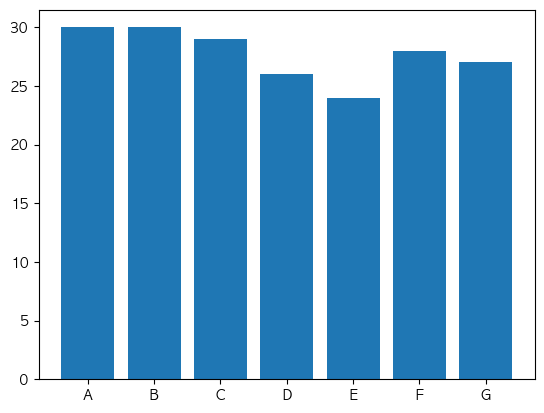

In [19]:
########################## '부화장'별 '부화한 병아리'갯수 그래프화 
#!pip install matplotlib
import matplotlib.pyplot as plt
########################## bar 차트 
plt.bar(hat['hatchery'],hat['chick'])
plt.show()

In [20]:
########################## 그래프 한글폰트 적용 

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 여기서 Matplotlib 코드를 사용하여 그래프 생성 및 표시
%matplotlib inline  

# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic')
plt.rc('font', family='AppleGothic') #맥 
plt.rcParams['axes.unicode_minus'] = False #부호

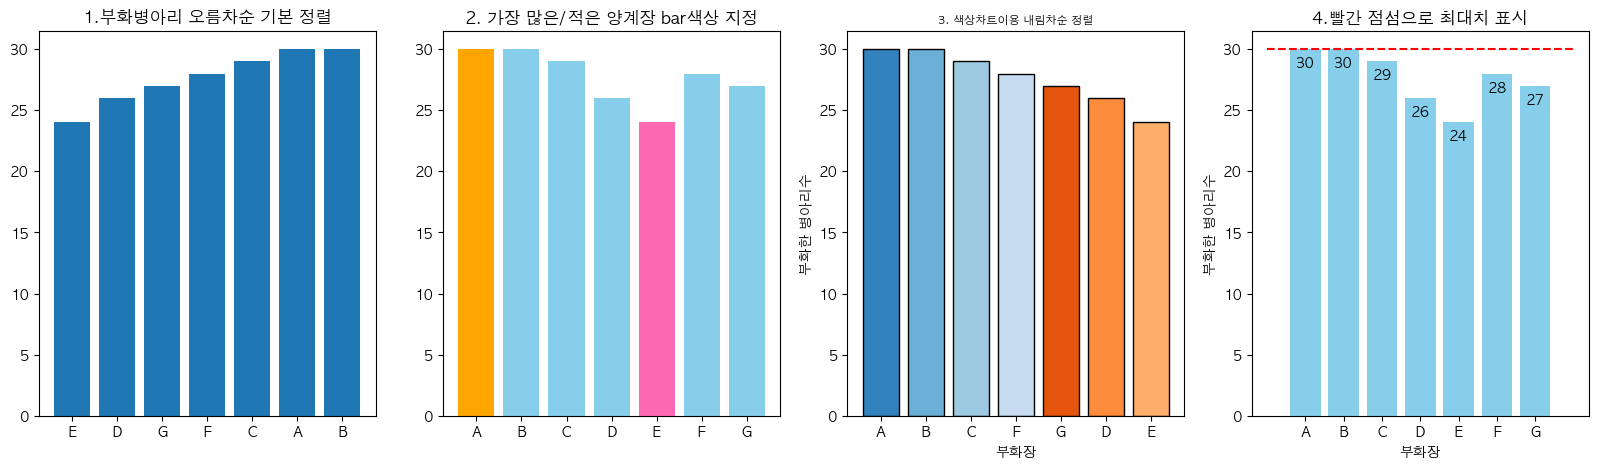

In [21]:
########################## '부화장'별 '부화한 병아리'갯수 그래프 응용 
#!pip install matplotlib
#import matplotlib.pyplot as plt

########################## 1행 4열 그래프 준비 
plt.figure(figsize=(20,5))

###  1  ####################### '부화한 병아리'수로 오름차순 정렬 
hat_sorted = hat.sort_values(by='chick',ascending=True)

plt.subplot(1,4,1) 
plt.bar(hat_sorted['hatchery'],hat_sorted['chick'])
plt.title('1.부화병아리 오름차순 기본 정렬')

###  2  ####################### 가장 적은 부화한 병아리 수가 있는 E 양계장 bar 색상만 변경 
#colors = ['skyblue' if hatch != 'E' else 'orange' for hatch in hat['hatchery']]
colors = ['orange' if h == 'A' else 'hotpink' if h == 'E' else 'skyblue' for h in hat['hatchery']]

plt.subplot(1,4,2)
plt.bar(hat['hatchery'], hat['chick'], color=colors)
plt.title('2. 가장 많은/적은 양계장 bar색상 지정')

###  3  ####################### '부화한 병아리'수로 내림차순 정렬 
hat_sorted_false = hat.sort_values(by='chick',ascending=False)

########### seaborn팔레트 색상 지정 
#!pip install seaborn
import seaborn as sns
col7 = sns.color_palette('tab20c',7)
###########
plt.subplot(1,4,3)
plt.bar(hat_sorted_false['hatchery'],hat_sorted_false['chick'], color = col7 , edgecolor = 'black')
plt.title('3. 색상차트이용 내림차순 정렬', fontsize = 8)
plt.xlabel('부화장')
plt.ylabel('부화한 병아리수')

###  4  ####################### 각bar수치값 기재 + 최대값 점선 추가

def addtext(x,y): 
    for i in range(len(x)):   # x(컬럼)에 있는 값 하나하나
        plt.text(              # 차트위에 표시할거에요. 
            i,
            y[i] - 1.5,        # x값 하나하나 (i) y수치값 적을 위치 
            y[i], 
            ha = 'center'
        )

plt.subplot(1,4,4)
plt.bar(hat['hatchery'], hat['chick'], color='skyblue')
plt.hlines(30,-1,7,colors = 'red',linestyles = 'dashed')    # 최대치 점선 표시 
addtext(hat['hatchery'],hat['chick'])                       # 각 수치값 기재 
plt.title('4.빨간 점섬으로 최대치 표시')
plt.xlabel('부화장')
plt.ylabel('부화한 병아리수')

plt.show()

########################## 4개 모두 동일 내용이지만, 더 나은 그래프 형태를 파악하기 위해 4개로 제작함 

In [22]:
########################## 총 부화한 마리갯수 파악 
hatchery_sum = hat['hatchery'].count()   # 양계장 갯수 
eggs_sum = hat['eggs'].sum()             # 알의 갯수 
chick_sum = hat['chick'].sum()           # 그 중 부화한 병아리 마리 수
not_chick = eggs_sum - chick_sum
print(f'{hatchery_sum} 개의 양계장에서 각 {eggs_sum / hatchery_sum}개씩, 총 {eggs_sum} 개의 알들이 있었습니다.')

########################## 부화율 파악 
# (부화한 병아리 마리수 / 총 알의 갯수) * 100 
hatch_rate = ( chick_sum/eggs_sum ) * 100
print(f'현재까지 총{chick_sum}마리 병아리가 부화하였고, 아직 부화하지 않은 {not_chick}의 알이 있어, 부화율은 {hatch_rate:.1f}%입니다.')

########################## 컬럼 추가 : 각 양계장 별 부화율을 나타냄 
hat['hatch_rate'] = (hat['chick'] / hat['eggs']) * 100 
hat['hatch_rate'] = hat['hatch_rate'].round(1)            # 소수점 1자리까지만 
#hat['hatch_rate'] = hat['hatch_rate'].astype(int)        # 소수점 없이 

########################## 최대,최소 마리가 부화한 양계장과 부화한 마리수 
max_chick_hats = hat[hat['chick'] == 30]['hatchery'].values 
max_chick = hat['chick'].max()      # 의 부화한 마리수 

# min_hat = hat['hatchery'].min()     # 가장 적게 부화한 양계장 E인데 A로 나옴 
min_chick_hat = hat[hat['chick'] == hat['chick'].min()]['hatchery'].values
min_chick = hat['chick'].min()      # 의 부화한 마리수

print(f'가장 많이 부화한 양계장은 {max_chick_hats}이고, {max_chick}마리가 부화했습니다.')
print(f'가장 적게 부화한 양계장은 {min_chick_hat}이고, {min_chick}마리가 부화했습니다.')
print(f'두 양계장의 차이는 {max_chick - min_chick}마리 입니다.')

7 개의 양계장에서 각 30.0개씩, 총 210 개의 알들이 있었습니다.
현재까지 총194마리 병아리가 부화하였고, 아직 부화하지 않은 16의 알이 있어, 부화율은 92.4%입니다.
가장 많이 부화한 양계장은 ['A' 'B']이고, 30마리가 부화했습니다.
가장 적게 부화한 양계장은 ['E']이고, 24마리가 부화했습니다.
두 양계장의 차이는 6마리 입니다.


# 결과 
```
7 개의 양계장에서 각 30.0개씩, 총 210 개의 알들이 있었습니다.
현재까지 총194마리 병아리가 부화하였고, 아직 부화하지 않은 16의 알이 있어, 부화율은 92.4%입니다.
가장 많이 부화한 양계장은 ['A' 'B']이고, 30마리가 부화했습니다.
가장 적게 부화한 양계장은 ['E']이고, 24마리가 부화했습니다.
두 양계장의 차이는 6마리 입니다.
```

---

# 2. 부화한 병아리들의 몸무게는 얼마일까요? 

In [23]:
########################## 데이터 불러오기 
b_chicks = pd.read_csv('./data/ch4-2.csv')
########################## B부화장에서 부화한 30마리 병아리의 번호와 몸무게 
b_chicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   chick_nm  30 non-null     object
 1   weight    30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [24]:
b_chicks.describe()    # B부화장에서 부화한 30마리의 몸무게 (통계수치)

,weight
count,30.000000
mean,38.400000
std,3.286335
min,31.000000
25%,36.250000
50%,39.000000
75%,40.750000
max,45.000000


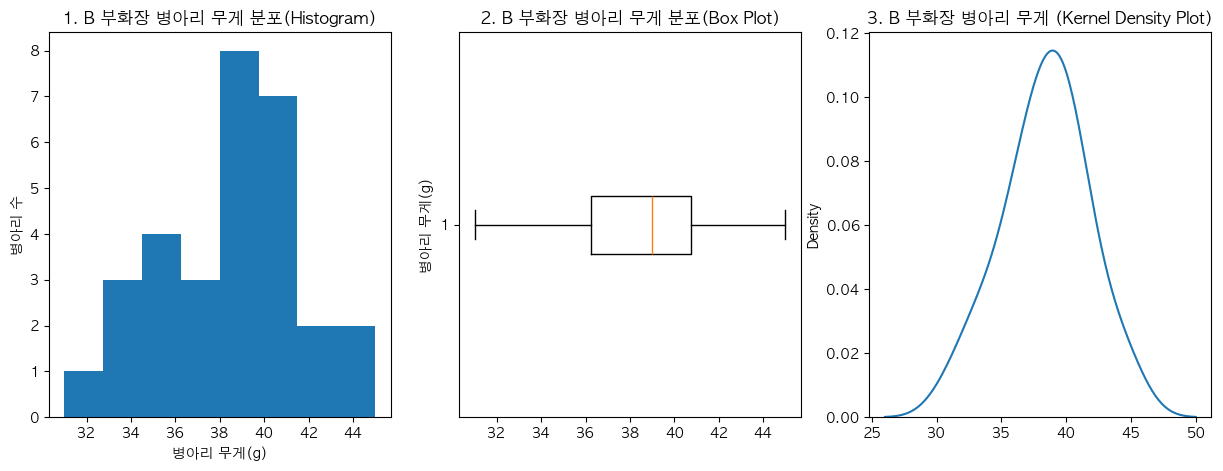

In [25]:
########################## B 부화장 병아리의 무게 분포도 확인 (표준편차 std : 3.286335)

# 평균mean값이 38.4 인데, 서로 너무 많이 차이가 나면 병아리 사육하는데 어려울 수 있으니 확인해봅니다. 

plt.figure(figsize=(15,5))
plt.rcParams['font.size'] = 10

########################## 히스토그램으로 분포도 확인 

plt.subplot(1,3,1)
plt.hist(b_chicks.weight, bins=8)
plt.xlabel('병아리 무게(g)')
plt.ylabel('병아리 수')
plt.title('1. B 부화장 병아리 무게 분포(Histogram)')

########################## 상자그림으로 분포도 확인 

plt.subplot(1,3,2)
plt.boxplot(b_chicks.weight, vert = False)     # vert 박스플롯 모양 가로 (없으면 세로)
plt.title('2. B 부화장 병아리 무게 분포(Box Plot)')
plt.ylabel('병아리 무게(g)')

########################## 커널밀도그림으로 분포도 확인

plt.subplot(1,3,3)
sns.kdeplot(b_chicks.weight.values)
plt.title('3. B 부화장 병아리 무게 (Kernel Density Plot)')

plt.show()

In [26]:
########################## 통계치 변수화  
weight = b_chicks['weight'].describe()

weight_max = weight['max']
weight_min = weight['min']
weight_mean = weight['mean']      
weight_25 = weight['25%']         # Q1 
weight_median = weight['50%']
weight_75 = weight['75%']         # Q3 
weight_std = weight['std']

print(f'병아리 몸무게 최대값 {int(weight_max)}g ~ 최소값 {int(weight_min)}g 입니다.')
print(f'병아리 몸무게 평균값 {weight_mean}g이고, 중앙값은 {weight_median}g입니다.')

########################## IQR 값 구하기 

Q1 = weight_25  # weight['25%']    # b_chicks['weight'].quantile(0.25)
Q3 = weight_75  # weight['75%']    # b_chicks['weight'].quantile(0.75)
IQR = Q3 - Q1

########################## IQR값으로 max값 구하기 (잠재적인 이상치를 식별) 
# Q3 + ( IQR * 1.5 ) 

IQR_max = Q3 + (IQR * 1.5)
IQR_min = Q1 - (IQR * 1.5)

print(f'잠재적 이상치를 식별할수 있는 기준값으로는, {IQR_max}g 이상값이거나 {IQR_min}g 미만값입니다.')
print(f'현재까지는 이상치로 보여지는 값들은 없으며, 정규분포에 가까운 형태로 보여집니다.')

병아리 몸무게 최대값 45g ~ 최소값 31g 입니다.
병아리 몸무게 평균값 38.4g이고, 중앙값은 39.0g입니다.
잠재적 이상치를 식별할수 있는 기준값으로는, 47.5g 이상값이거나 29.5g 미만값입니다.
현재까지는 이상치로 보여지는 값들은 없으며, 정규분포에 가까운 형태로 보여집니다.


# 결과 
```
병아리 몸무게 최대값 45g ~ 최소값 31g 입니다.
병아리 몸무게 평균값 38.4g이고, 중앙값은 39.0g입니다.
잠재적 이상치를 식별할수 있는 기준값으로는, 47.5g 이상값이거나 29.5g 미만값입니다.
현재까지는 이상치로 보여지는 값들은 없으며, 정규분포에 가까운 형태로 보여집니다.
```

# 3. 사료 제조사별 성능 차이가 있을까요? 

In [27]:
########################## 데이터 불러오기 
test = pd.read_csv('./data/ch4-3.csv')
########################## 부화된지 5일 지난, 각 부화장에서의 병아리들의 몸무게 데이터 비교 
test

,hatchery,chick_nm,weight
0,A,a01,112
1,A,a05,116
2,A,a09,106
3,A,a12,104
4,A,a15,116
5,A,a17,118
6,A,a26,110
7,A,a28,112
8,A,a29,106
9,A,a30,108


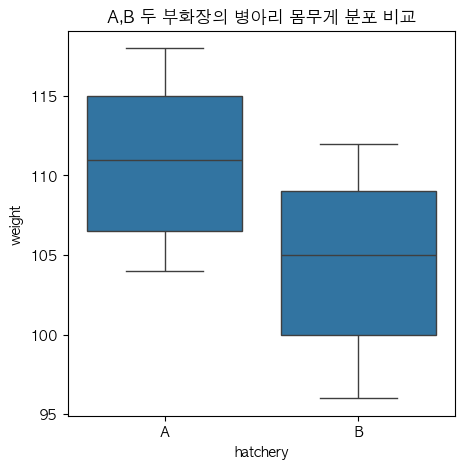

In [28]:
########################## 두 집단 분포 비교를 위해 boxplot 시각화 

plt.figure(figsize=(5,5))

########## plt.boxplot(data = test , x ='hatchery',y='weight')    이 방식의 boxplot은 sns이다. 

sns.boxplot(data = test ,  x='hatchery',y='weight')

plt.title('A,B 두 부화장의 병아리 몸무게 분포 비교')
plt.show()